# Scenario 3
For scenario 3, from the description: "Explore the space of closely related models (structurally speaking) that incorporate either deaths, hospitalizations, or both.". For this purpose, models 958 and 960 are relevant.

In [14]:
# Get models 958 and 960
from mira.sources.biomodels import get_template_model

model_958 = get_template_model("BIOMD0000000958")
model_960 = get_template_model("BIOMD0000000960")

# Save the petrinet version of the models
from mira.modeling import Model
from mira.modeling.petri import PetriNetModel
petri_958 = PetriNetModel(Model(model_958))
petri_960 = PetriNetModel(Model(model_960))
for mname, model in [("scenario3_biomd958.json", petri_958), ("scenario3_biomd960.json", petri_960)]:
    model.to_json_file(mname, indent=1)
# Also dump the mira model jsons
with open("scenario3_biomd958_mira.json", "w") as f:
    f.write(model_958.json(indent=1))
with open("scenario3_biomd960_mira.json", "w") as f:
    f.write(model_960.json(indent=1))

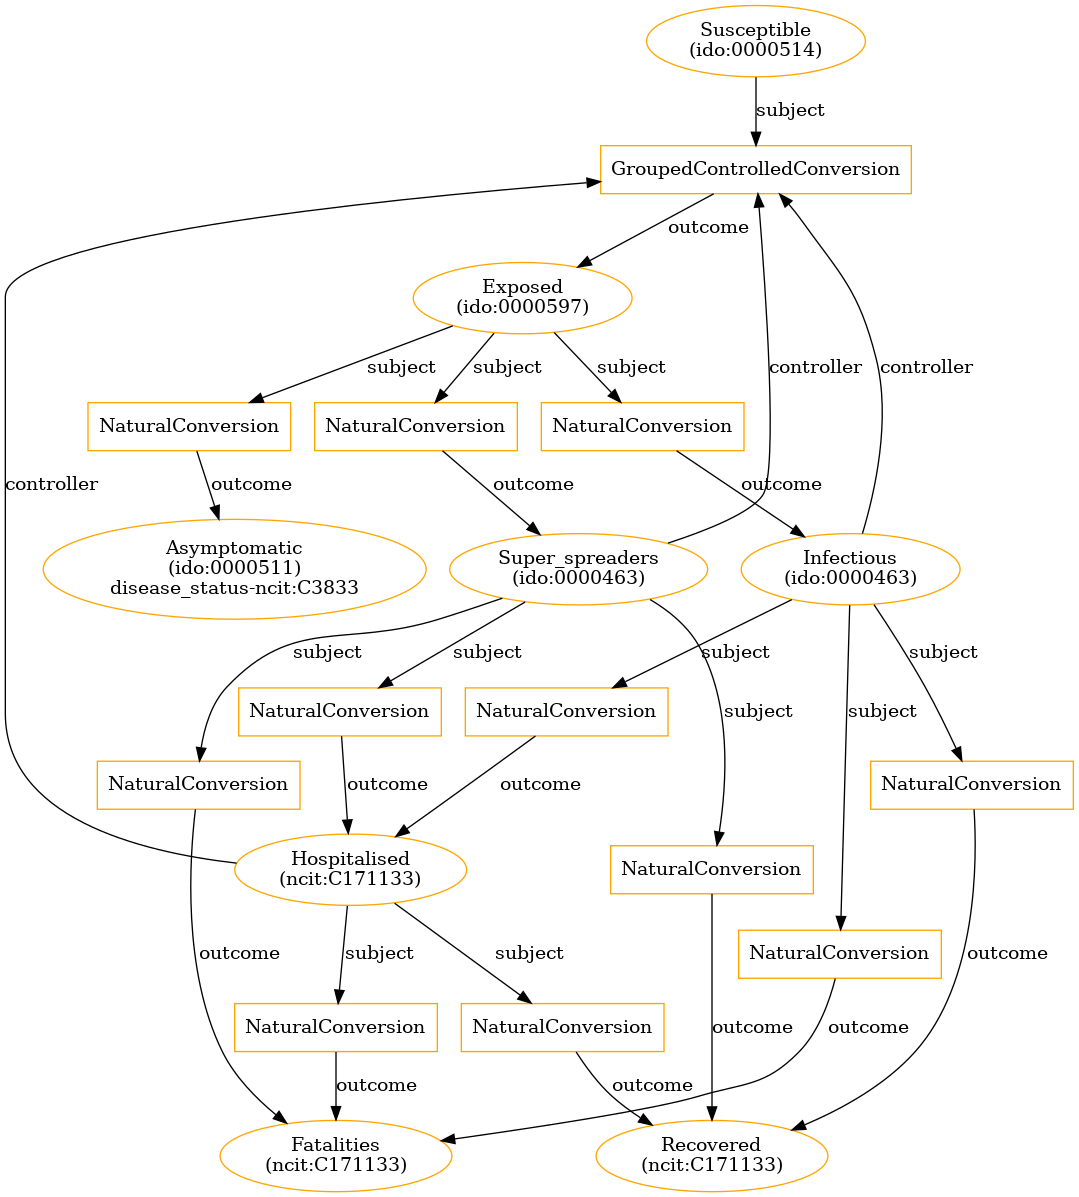

In [11]:
# Check out the models
from IPython.display import Image
model_958.draw_graph("sc3_model_958.png")
Image(filename="sc3_model_958.png")

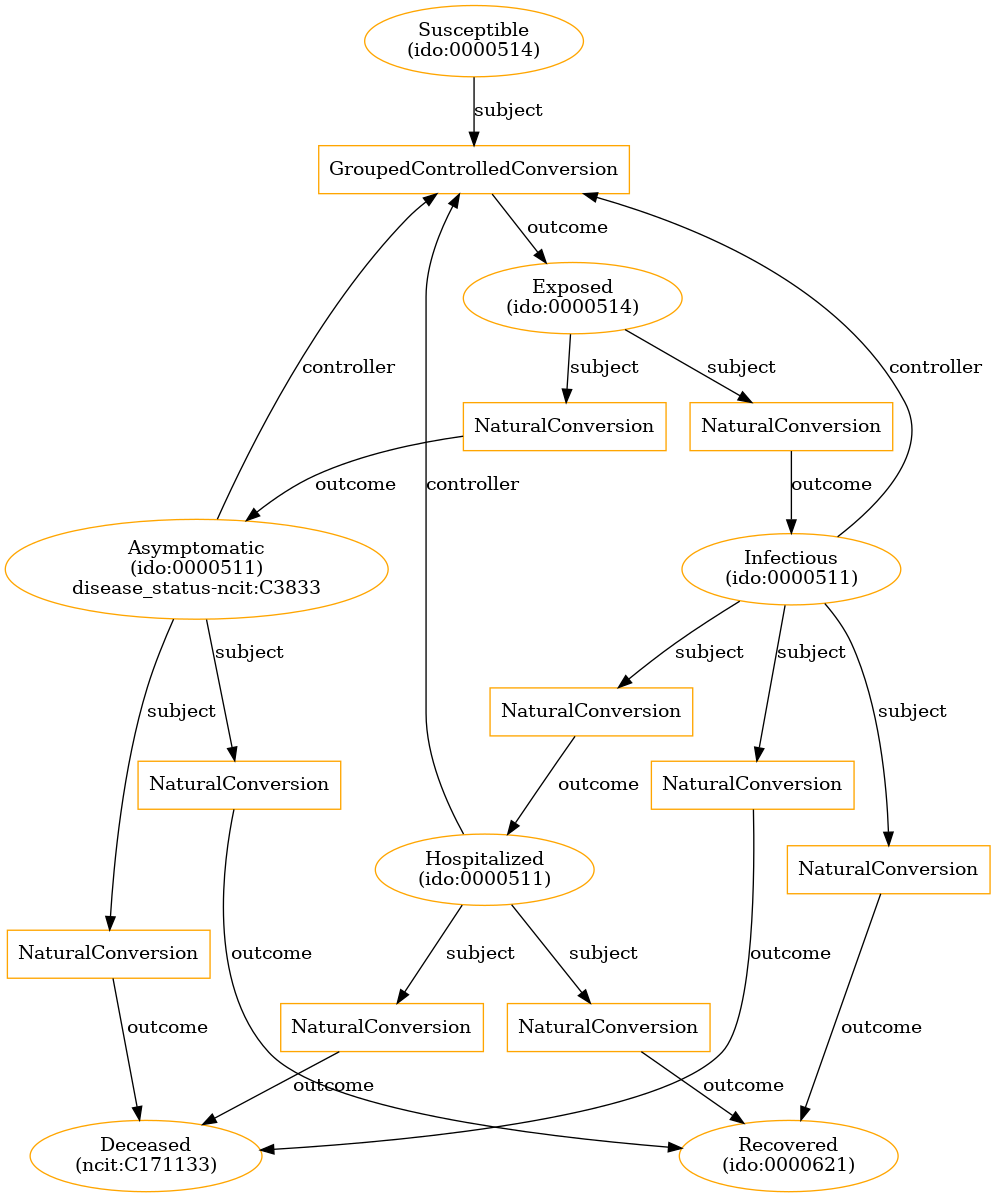

In [12]:
model_960.draw_graph("sc3_model_960.png")
Image(filename="sc3_model_960.png")

In [6]:
# Compare the models
from mira.dkg.web_client import is_ontological_child_web
from mira.metamodel import TemplateModelDelta
tmd = TemplateModelDelta(model_958, model_960, refinement_function=is_ontological_child_web)
tmd.draw_graph("sc3_model_958_960_delta.png")

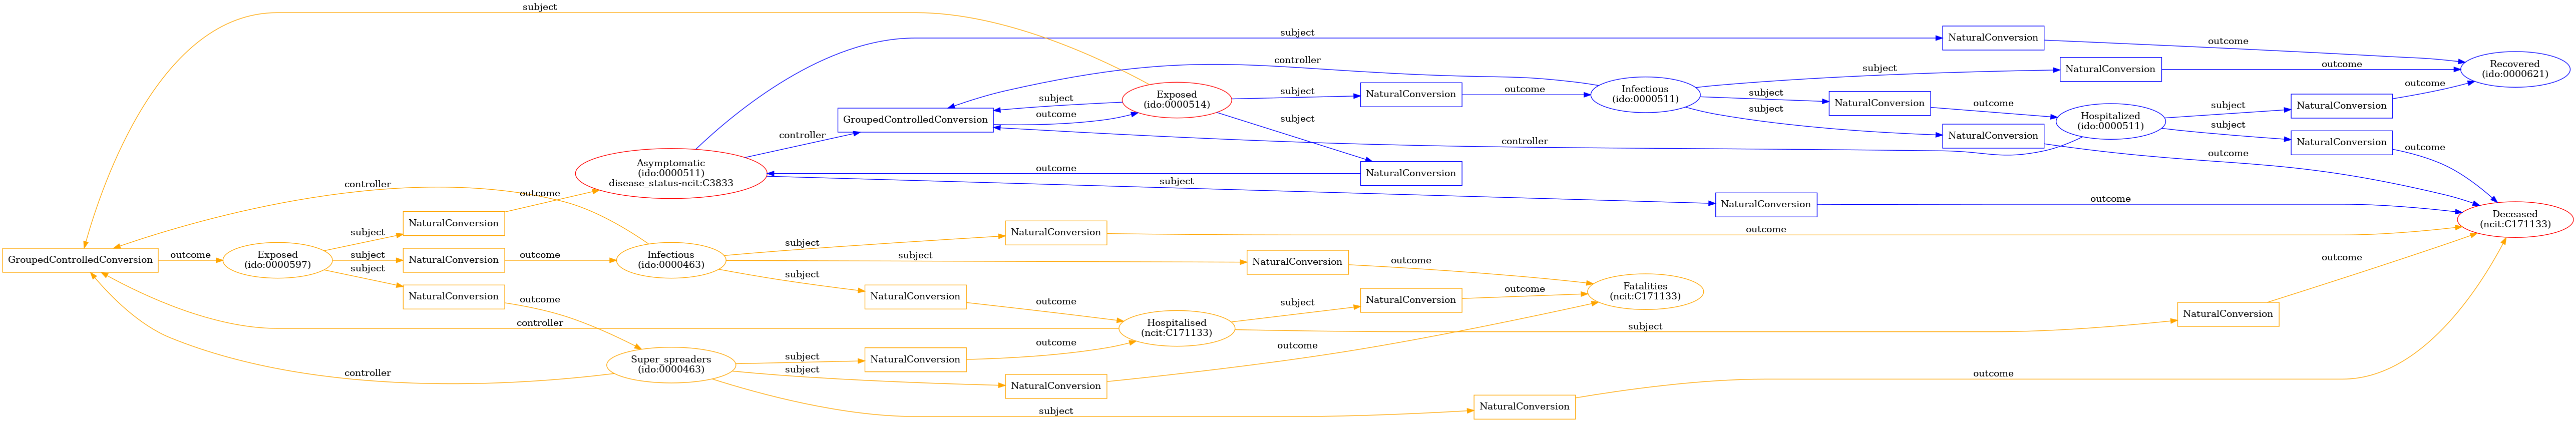

In [7]:
Image(filename="sc3_model_958_960_delta.png")

## Add vaccination
We now need to add vaccination to the two models

In [ ]:
from mira.examples.concepts import vaccinated
from mira.metamodel import NaturalConversion

# Get the susceptible Concepts from each of the models
susceptible_958 = None
for template in model_958.templates:
    if template.name == "GroupedControlledConversion":
        susceptible_958 = template.subject
        break

susceptible_960 = None
for template in model_960.templates:
    if template.name == "GroupedControlledConversion":
        susceptible_960 = template.subject
        break

vaccination_conversion_958 = NaturalConversion(subject=susceptible_958, outcome=vaccinated)
vaccination_conversion_960 = NaturalConversion(subject=susceptible_960, outcome=vaccinated, )